In [1]:
import tensorflow as tf # deep learning library
import numpy as np # for matrix operations
import matplotlib.pyplot as plt # for visualization
%matplotlib inline

from tensorflow.keras.datasets.mnist import load_data # To load the MNIST digit dataset

(X_train, y_train) , (X_test, y_test) = load_data() # Loading data

print("There are ", len(X_train), "images in the training dataset") # checking total number of records / data points available in the X_train dataset
print("There are ", len(X_test), "images in the test dataset") # checking total number of records / data points available in the X_test dataset

There are  60000 images in the training dataset
There are  10000 images in the test dataset


In [2]:
# Checking the shape of one image
X_train[0].shape

(28, 28)

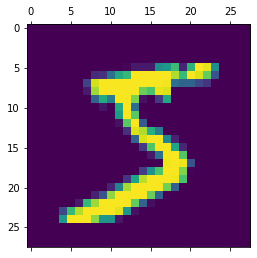

In [3]:
plt.matshow(X_train[0])

In [4]:
y_train[0]

5

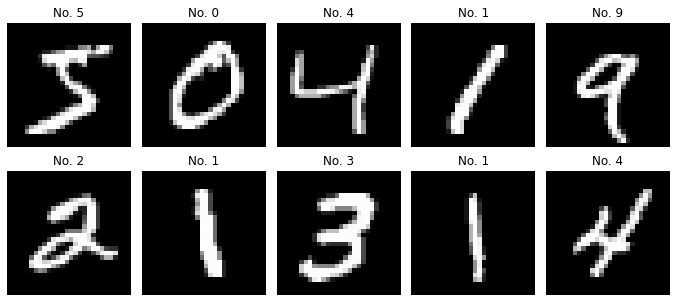

In [8]:
# code to view the images
num_rows, num_cols = 2, 5
f, ax = plt.subplots(num_rows, num_cols, figsize=(12,5),
gridspec_kw={'wspace':0.03, 'hspace':0.2},
squeeze=True)

for r in range(num_rows):
    for c in range(num_cols):

            image_index = r * 5 + c
            ax[r,c].axis("off")
            ax[r,c].imshow( X_train[image_index], cmap='gray')
            ax[r,c].set_title('No. %d' % y_train[image_index])
plt.show()
plt.close()

In [9]:
#normalize the data
X_train = X_train / 255
X_test = X_test / 255

#flatten the data
X_train.shape
X_train_flattened = X_train.reshape(len(X_train), 28*28) # converting our 2D array representin an image to one dimensional
X_test_flattened = X_test.reshape(len(X_test), 28*28)
X_train_flattened.shape

(60000, 784)

In [10]:
# Defining the model
model = tf.keras.Sequential([
tf.keras.layers.Dense(100, input_shape=(784,), activation='relu'),
tf.keras.layers.Dense(100, input_shape=(100,),activation='relu'),
tf.keras.layers.Dense(10, activation='sigmoid')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               78500     
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 89,610
Trainable params: 89,610
Non-trainable params: 0
_________________________________________________________________


In [12]:
# Compiling the model
model.compile(optimizer='adam',
loss='sparse_categorical_crossentropy',
metrics=['accuracy'])

# Fit the model
model.fit(X_train_flattened, y_train, batch_size= 128,epochs=10)

Epoch 1/10
469/469 [==============================] - 1s 1ms/step - loss: 0.0547 - accuracy: 0.9836
Epoch 2/10
469/469 [==============================] - 1s 1ms/step - loss: 0.0428 - accuracy: 0.9865
Epoch 3/10
469/469 [==============================] - 1s 1ms/step - loss: 0.0358 - accuracy: 0.9890
Epoch 4/10
469/469 [==============================] - 1s 1ms/step - loss: 0.0267 - accuracy: 0.9921
Epoch 5/10
469/469 [==============================] - 1s 1ms/step - loss: 0.0254 - accuracy: 0.9916
Epoch 6/10
469/469 [==============================] - 1s 1ms/step - loss: 0.0200 - accuracy: 0.9940
Epoch 7/10
469/469 [==============================] - 1s 1ms/step - loss: 0.0160 - accuracy: 0.9950
Epoch 8/10
469/469 [==============================] - 1s 1ms/step - loss: 0.0147 - accuracy: 0.9954
Epoch 9/10
469/469 [==============================] - 1s 1ms/step - loss: 0.0144 - accuracy: 0.9952
Epoch 10/10
469/469 [==============================] - 1s 1ms/step - loss: 0.0131 - accuracy: 0.9960

In [13]:
# Evaluate the model
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 0s 736us/step - loss: 0.1053 - accuracy: 0.9754


[0.10528137534856796, 0.9753999710083008]

In [14]:
# saving the model
save_dir = "/results/"
model_name = 'keras_mnist.h5'
model.save(model_name)
model_path = save_dir + model_name
print('Saved trained model at %s ' % model_path)

Saved trained model at /results/keras_mnist.h5 
